In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# Authentication from twitter api -> https://developer.twitter.com/
# Create a app and get your keys
consumerKey = 'Y3qbEvNnl1kJ5QufR69kprCN4'
consumerSecret = 'uBwR6j5rdRvPBL03UnSi0V13RlKXRVd1SaJ5oJURdQSJsrqGGR'
accessToken = '3344461197-GTVIAeKj4DSNJRI2I24a2hvVBg0ajlZM9YVkJrE'
accessTokenSecret = 'Tke7S6JZZcV2tqpuUrYbs6dY2rFPIYlQmia7L0JfaNoUn'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
# Input for term to be searched and how many tweets to search
searchTerm = input("Enter the keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweet to search: "))

tweets = []
tweetText = []

# Searching for tweets 
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang ="en").items(NoOfTerms)

Enter the keyword/Tag to search about: microsoft
Enter how many tweet to search: 100


In [6]:
# Insert the tweets into a list and show in pandas DataFrame
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,The Cover-Up Continues: The Truth About Bill G...
1,"#proprietarySoftware #Microsoft Teams [sic] ""e..."
2,@jesawyer @trailerparkape I'm in the same boat...
3,@jasoncwarner I was on the WingZ team. Crushed...
4,"""ad:"" Microsoft Xbox Series X 1TB Video Game C..."
...,...
95,Microsoft Office #resume template gallery http...
96,"As an owner, do you have the most transparent ..."
97,Nigga wasted his time on Microsoft excel https...
98,Visit my entry in demo extravaganza and vote f...


## Cleaning Data
This regular expression was made to remove words with "@"

In [7]:
# Regular expression can be a very useful tool for data searching and replacement
# for more: https://www.tutorialspoint.com/python/python_reg_expressions.htm
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)"," ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [8]:
tweet_df.head()

,0,cleaned_data
0,The Cover-Up Continues: The Truth About Bill G...,The Cover Up Continues The Truth About Bill Ga...
1,"#proprietarySoftware #Microsoft Teams [sic] ""e...",proprietarySoftware Microsoft Teams sic exploi...
2,@jesawyer @trailerparkape I'm in the same boat...,I m in the same boat On a 1080 looking for a 3...
3,@jasoncwarner I was on the WingZ team. Crushed...,I was on the WingZ team Crushed by Microsoft E...
4,"""ad:"" Microsoft Xbox Series X 1TB Video Game C...",ad Microsoft Xbox Series X 1TB Video Game Cons...


In [9]:
# Function to remove numbers
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new) 
tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [10]:
tweet_df

,0,cleaned_data
0,The Cover-Up Continues: The Truth About Bill G...,The Cover Up Continues The Truth About Bill Ga...
1,"#proprietarySoftware #Microsoft Teams [sic] ""e...",proprietarySoftware Microsoft Teams sic exploi...
2,@jesawyer @trailerparkape I'm in the same boat...,I m in the same boat On a looking for a You ...
3,@jasoncwarner I was on the WingZ team. Crushed...,I was on the WingZ team Crushed by Microsoft E...
4,"""ad:"" Microsoft Xbox Series X 1TB Video Game C...",ad Microsoft Xbox Series X TB Video Game Conso...
...,...,...
95,Microsoft Office #resume template gallery http...,Microsoft Office resume template gallery caree...
96,"As an owner, do you have the most transparent ...",As an owner do you have the most transparent d...
97,Nigga wasted his time on Microsoft excel https...,Nigga wasted his time on Microsoft excel
98,Visit my entry in demo extravaganza and vote f...,Visit my entry in demo extravaganza and vote f...


In [11]:
# Changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [12]:
# Import the packages from NLTK 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HudsonCarol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Convert a word to its base form - ‘Caring’ -> Lemmatization -> ‘Care’
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [14]:
tweet_df['cleaned_data'].values

array(['the cover up continues the truth about bill gate microsoft and jeffrey epstein',
       'proprietarysoftware microsoft team sic exploit exposed sensitive file email and chat log',
       'i m in the same boat on a looking for a you re a part of microsoft now you g',
       'i wa on the wingz team crushed by microsoft excel',
       'ad microsoft xbox series x tb video game console black free shipping',
       'todd howard talked some more about what the microsoft bethesda partnership and subsequent exclusivity mean',
       'microsoft banned crypto mining from their store how are they going to feel',
       'window image of microsoft s next operating system leaked',
       'p fanboys are really gon na log onto their window gaming pc purchase a game from a microsoft game studio',
       'beginning on june th check out the new amplifying black voice series premiering on the humansofit blog the ne',
       'congratulation on this glorious news board aapi',
       'bethesda is lite

In [15]:
# Remove Stop Words from the data
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text
tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopwords)

In [16]:
tweet_df['cleaned_data'][:5].values

array(['cover continues truth bill gate microsoft jeffrey epstein',
       'proprietarysoftware microsoft team sic exploit exposed sensitive file email chat log',
       'boat looking part microsoft g',
       'wa wingz team crushed microsoft excel',
       'ad microsoft xbox series x tb video game console black free shipping'],
      dtype=object)

In [17]:
# Lets calculate the polarity of the reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol == 0):
        return "Neutral"
    elif(pol > 0 and pol <= 0.3):
        return "Weakly Positive"
    elif(pol > 0.3 and pol <= 0.6):
        return "Positive"
    elif(pol> 0.6 and pol <= 1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol <= 0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol <= -0.3):
        return "Negative"
    elif(pol> -1 and pol <=-0.6):
        return "Strongly Negative"
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)      

In [18]:
# Count the values by polarity
tweet_df['polarity'].value_counts()

Neutral              52
Weakly Positive      19
Weakly Negative      10
Positive              9
Negative              6
Strongly Positive     2
Strongly Negative     2
Name: polarity, dtype: int64

In [23]:
# Summarizing the polarity
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0, 50):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+=textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    
    if (pol == 0): #addind reaction of how people are reacting to find
        neutral += 1
    elif (pol > 0  and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3  and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <=1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1        

In [24]:
# Finding the average reaction
polarity = polarity / NoOfTerms
polarity

0.000196699134199137

In [27]:
# Function to calculate percentage
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [28]:
# Calculate the percentage for each sentiment
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [30]:
# Show the percentage result of each sentiment
print('positive: ' + positive + '%')
print('weakly positive: ' + wpositive + '%')
print('strongly positive: ' + spositive + '%')
print('negative: ' + negative + '%')
print('weakly negative: ' + wnegative + '%')
print('strongly negative: ' + snegative + '%')
print('neutral: ' + neutral + '%')


positive: 2.00%
weakly positive: 7.00%
strongly positive: 1.00%
negative: 4.00%
weakly negative: 6.00%
strongly negative: 1.00%
neutral: 29.00%


In [31]:
# Printing out data - General Report
print("How people are reacting on "+ searchTerm + " by analyzing " + str(NoOfTerms) + " tweets. ")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if(polarity == 0):
    print("Neutral")
elif(polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif(polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif(polarity> 0.6 and polarity <= 1):
    print("Strongly Positive")
elif(polarity>-0.3 and polarity <= 0):
    print("Weakly Negative")
elif(polarity>-0.6 and polarity <= -0.3):
    print("Negative")  
elif(polarity> -1 and polarity <=-0.6):
    print("Strongly Negative") 
    
#Printing out data - Detailed Report

print()
print("-----------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print()

print(str(positive) + " % people thought it was positive")
print(str(wpositive) + " % people thought it was weakly positive")
print(str(spositive) + " % people thought it was strongly positive")
print(str(negative) + " % people thought it was negative")
print(str(wnegative) + " % people thought it was weakly negative")
print(str(snegative) + " % people thought it was strongly negative")
print(str(neutral) + " % people thought it was neutral")    

How people are reacting on microsoft by analyzing 100 tweets. 

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

-----------------------------------------------------------------------------------------

Detailed Report: 

2.00 % people thought it was positive
7.00 % people thought it was weakly positive
1.00 % people thought it was strongly positive
4.00 % people thought it was negative
6.00 % people thought it was weakly negative
1.00 % people thought it was strongly negative
29.00 % people thought it was neutral


In [32]:
# Preparation to plot the sentiment in pie graph
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
labels = ['Positive [' + str(positive) + '%]',
         'Weakly Positive [' + str(wpositive) + '%]',
         'Strongly Positive [' +str(spositive) + '%]',
         'Neutral [' +str(neutral) + '%]',
         'Negative [' +str(negative) + '%]',
         'Weakly Negative [' +str(wnegative) + '%]',
         'Strongly Negative [' +str(snegative) + '%]']

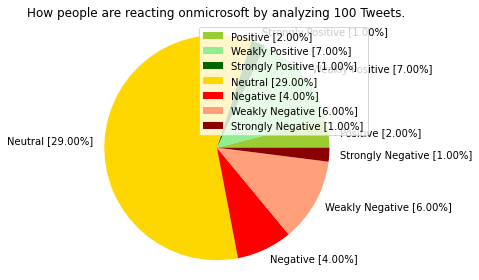

In [34]:
# Show the sentiments analysis in pie graph
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()